# Data Preprocessing & Cleaning 

0.1 Load data into pandas dataframe

In [3]:
import pandas as pd

df = pd.read_csv("F:\Omar 3amora\Heart_Disease_Project\Data\heart_disease_uci.csv")

In [4]:
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


0.1.1 Know the missing data


In [10]:
#Quick summary of missing values per column
print(df.isnull().sum())


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [12]:
#Count total missing values in the DataFrame
print(df.isnull().sum().sum())


1759


In [13]:
# Show rows with missing data
print(df[df.isnull().any(axis=1)])

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
87    88   53  Female      Cleveland      non-anginal     128.0  216.0  False   
166  167   52    Male      Cleveland      non-anginal     138.0  223.0  False   
192  193   43    Male      Cleveland     asymptomatic     132.0  247.0   True   
266  267   52    Male      Cleveland     asymptomatic     128.0  204.0   True   
287  288   58    Male      Cleveland  atypical angina     125.0  220.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

0.2 Handle missing values (imputation or removal). 

In [14]:
missing_cols = df.columns[df.isnull().any()]
print(missing_cols)


Index(['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')


In [15]:
from sklearn.impute import SimpleImputer

numeric_missing = df[missing_cols].select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy="mean")
df[numeric_missing] = imputer_num.fit_transform(df[numeric_missing])


In [16]:
categorical_missing = df[missing_cols].select_dtypes(include=['object']).columns

imputer_cat = SimpleImputer(strategy="most_frequent")
df[categorical_missing] = imputer_cat.fit_transform(df[categorical_missing])


In [18]:
print(df.isnull().sum())  
# should all be 0 now as there's no null data


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [20]:
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   18.443895  108.957634   25.138494    1.053774   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  177.750000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  221.000000  138.000000    0.800000   
75%    690.250000   60.000000  140.000000  267.000000  156.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  920.000000  920.000000  
mean     0.676375    0.995652  
std      0.541667    1.142693  
min      0.000000    0.000000  
25%      0.676375    0.000000  
50%      0.676375    1.000000  
75%      0.676375    2.000000  
max      3.000

0.3 Data Encoding

In [ ]:
#converting those categories (like "Male", "Female", "Yes", "No") into numeric values that models can understand.

In [ ]:
# List categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)


Categorical columns: Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [23]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Preview the result
print(df_encoded.head())


   id  age  trestbps   chol  thalch  oldpeak   ca  num  sex_Male  \
0   1   63     145.0  233.0   150.0      2.3  0.0    0      True   
1   2   67     160.0  286.0   108.0      1.5  3.0    2      True   
2   3   67     120.0  229.0   129.0      2.6  2.0    1      True   
3   4   37     130.0  250.0   187.0      3.5  0.0    0      True   
4   5   41     130.0  204.0   172.0      1.4  0.0    0     False   

   dataset_Hungary  ...  cp_non-anginal  cp_typical angina  fbs_True  \
0            False  ...           False               True      True   
1            False  ...           False              False     False   
2            False  ...           False              False     False   
3            False  ...            True              False     False   
4            False  ...           False              False     False   

   restecg_normal  restecg_st-t abnormality  exang_True  slope_flat  \
0           False                     False       False       False   
1           Fals

0.4 Standerlization

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df.head())


         id       age     sex    dataset               cp  trestbps      chol  \
0 -1.730169  1.007386    Male  Cleveland   typical angina  0.698041  0.311021   
1 -1.726404  1.432034    Male  Cleveland     asymptomatic  1.511761  0.797713   
2 -1.722639  1.432034    Male  Cleveland     asymptomatic -0.658158  0.274289   
3 -1.718873 -1.752828    Male  Cleveland      non-anginal -0.115679  0.467130   
4 -1.715108 -1.328180  Female  Cleveland  atypical angina -0.115679  0.044717   

     fbs         restecg    thalch  exang   oldpeak        slope        ca  \
0   True  lv hypertrophy  0.495698  False  1.349421  downsloping -1.249371   
1  False  lv hypertrophy -1.175955   True  0.589832         flat  4.292099   
2  False  lv hypertrophy -0.340128   True  1.634267         flat  2.444942   
3  False          normal  1.968345  False  2.488805  downsloping -1.249371   
4  False  lv hypertrophy  1.371326  False  0.494884    upsloping -1.249371   

                thal       num  
0       fix

0.5 EDA

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

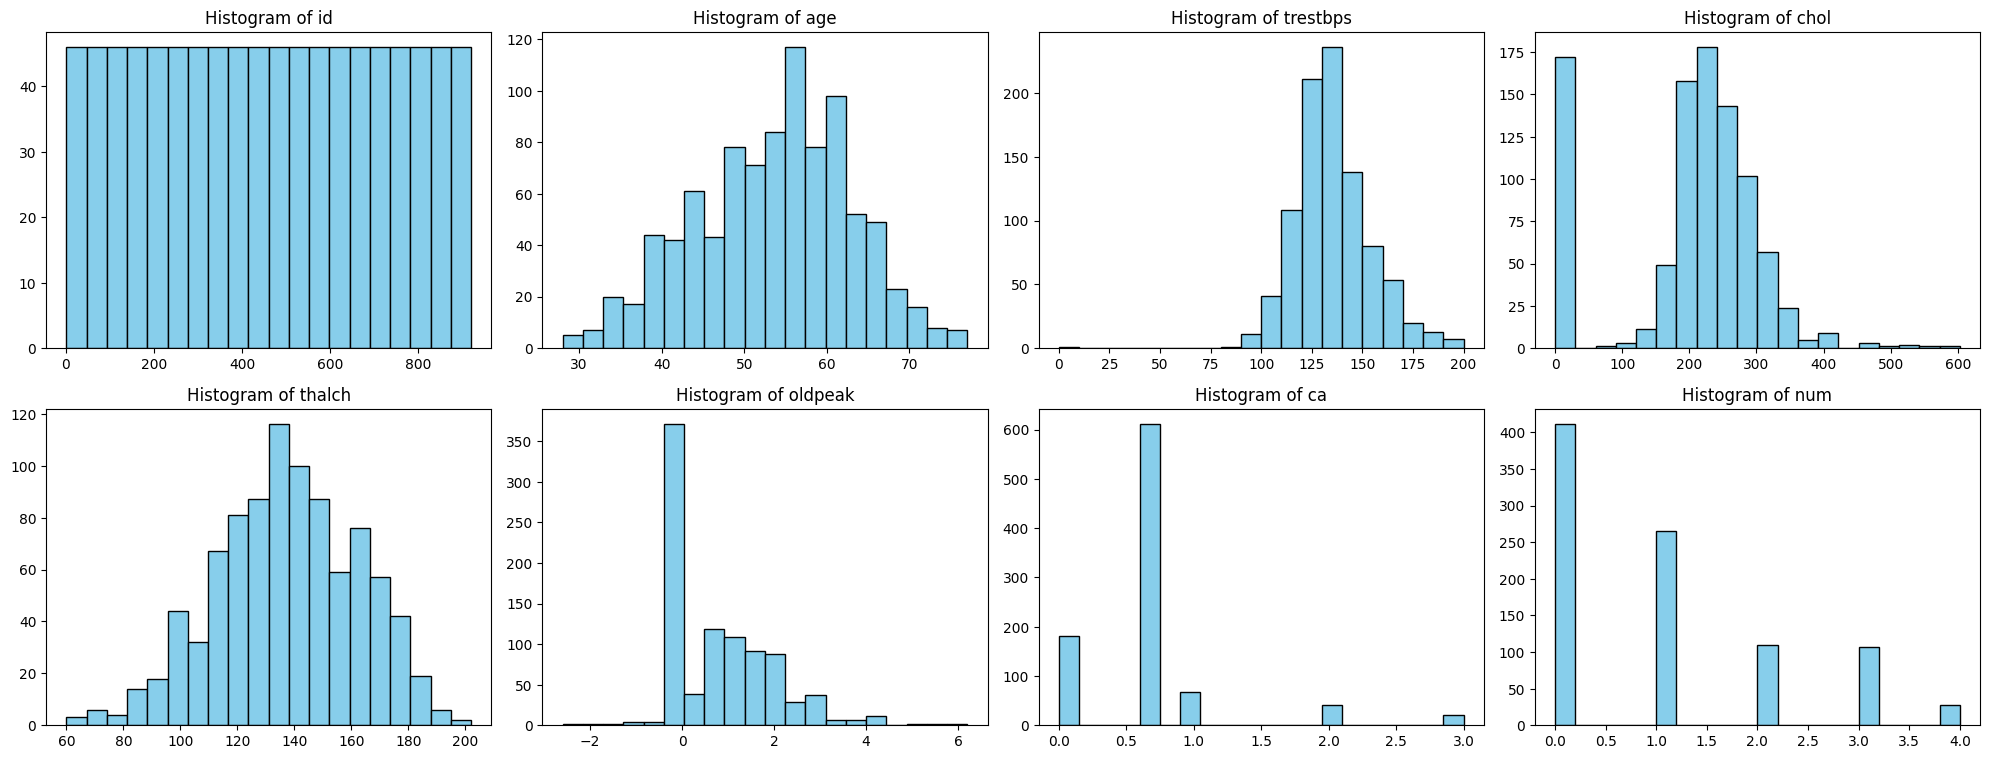

In [27]:
# Histogram
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on number of columns
    plt.hist(df_encoded[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

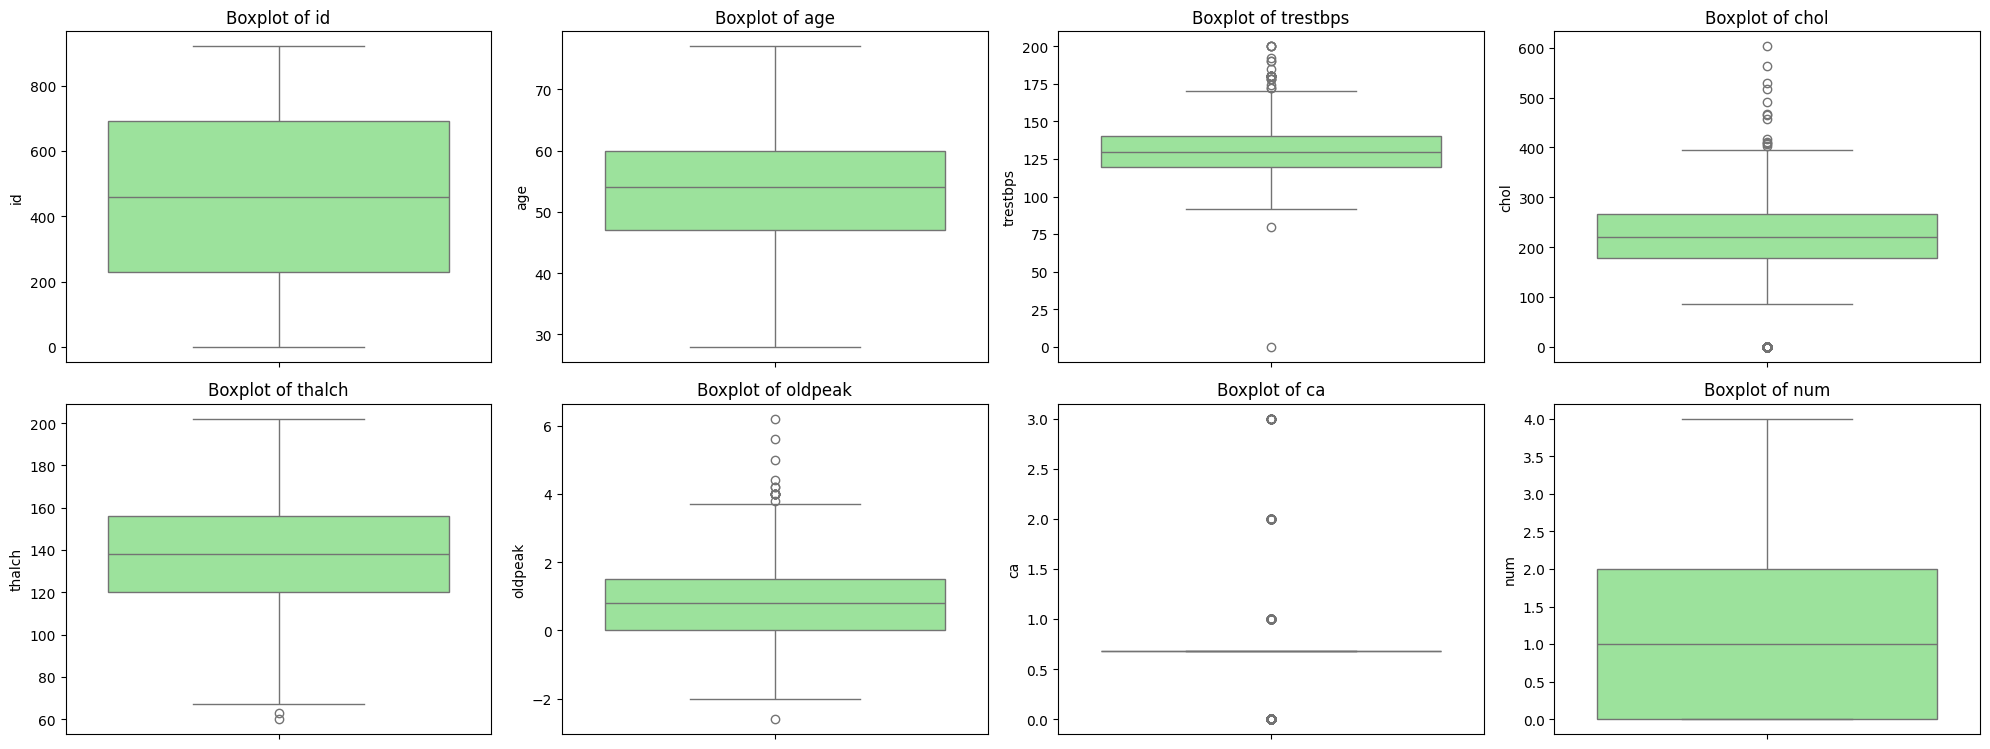

In [28]:
#Boxplot
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_encoded[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

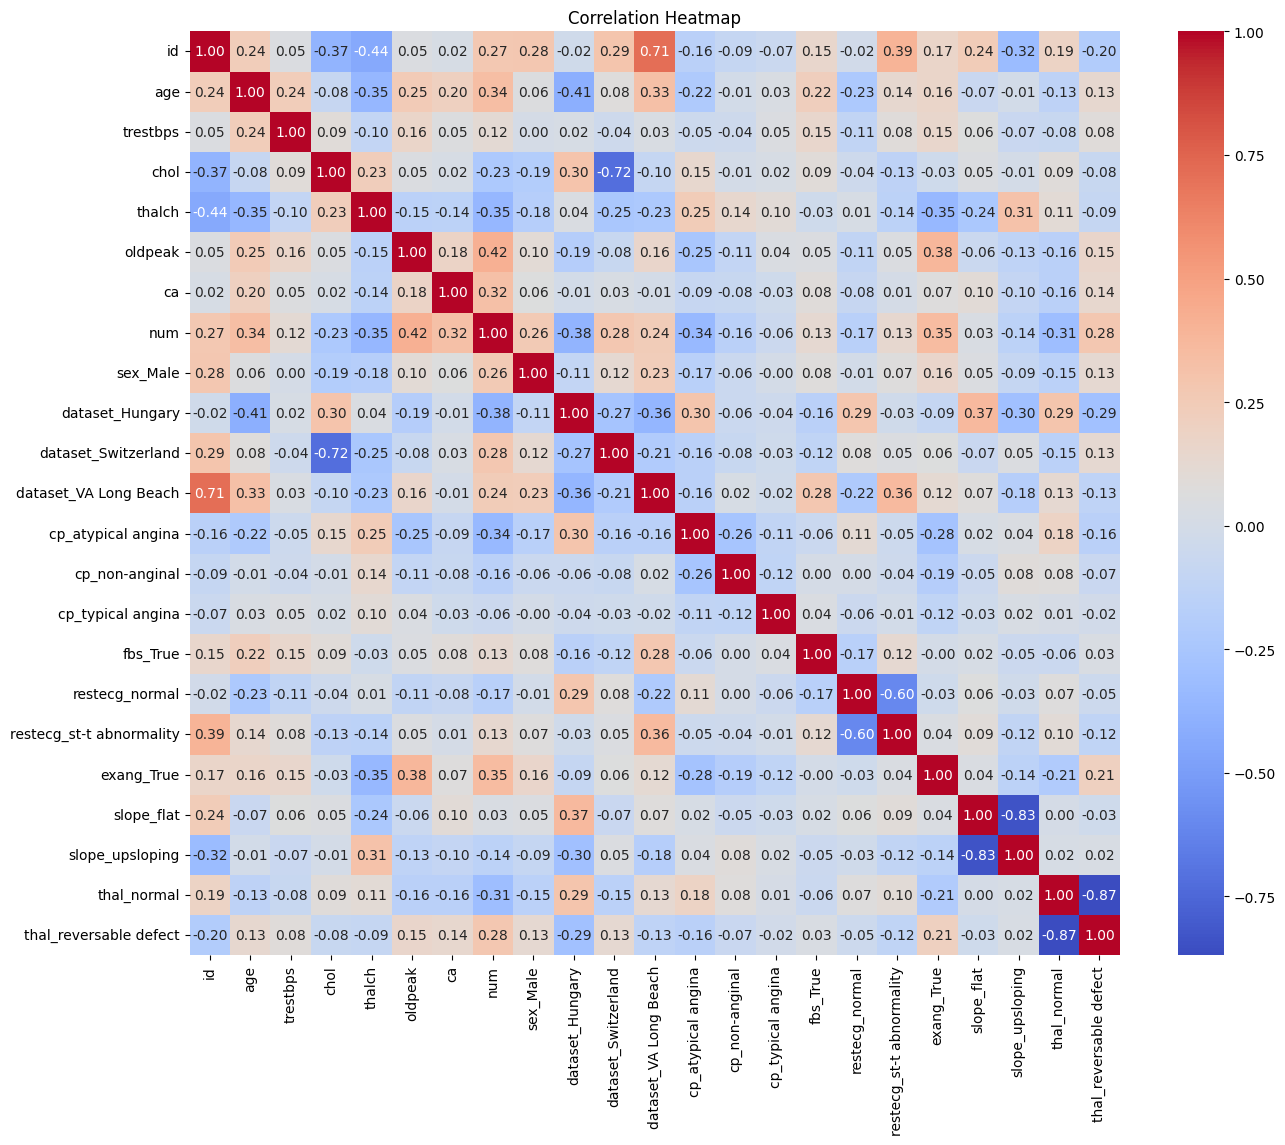

In [29]:
# Correlation
plt.figure(figsize=(15, 12))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [30]:
df_encoded.to_csv("F:\Omar 3amora\Heart_Disease_Project\Data\heart_disease_cleaned.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!
